# Visualizing Model Output

#### Overview
In this notebook, we will work to visualize the results of the `tutorial_global_oce_latlon` experiment that we ran on Spartan.

#### Import Modules
First, import the modules required to access read data, create plots, and generate movies:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip

After the modules are loaded in, establish a path to the directory for this week's class:

In [17]:
# Define a path to this lesson's folder
lesson_folder = '/Users/cool/Workspace/MLML/ms274_fall2025/Lectures/Week 5/'

## Visualizing Model Fields

A first step in visualizing model output is to plot a single model field. Here, let's start with the zonal velocity field `UVEL`. Let's read in one of those fields here:

In [18]:
# provide a path to the data file
zonal_file = os.path.join(lesson_folder, 'run', 'diags', 'UVEL', 'UVEL.0000000365.data')

# read in the file and reshape it to the proper dimensions
n_rows = 40  #sNy
n_cols = 90 #sNx
nz = 15
u_grid = np.fromfile(zonal_file, '>f4').reshape((n_rows, n_cols))

Next, let's plot the data on a figure with a colorbar:

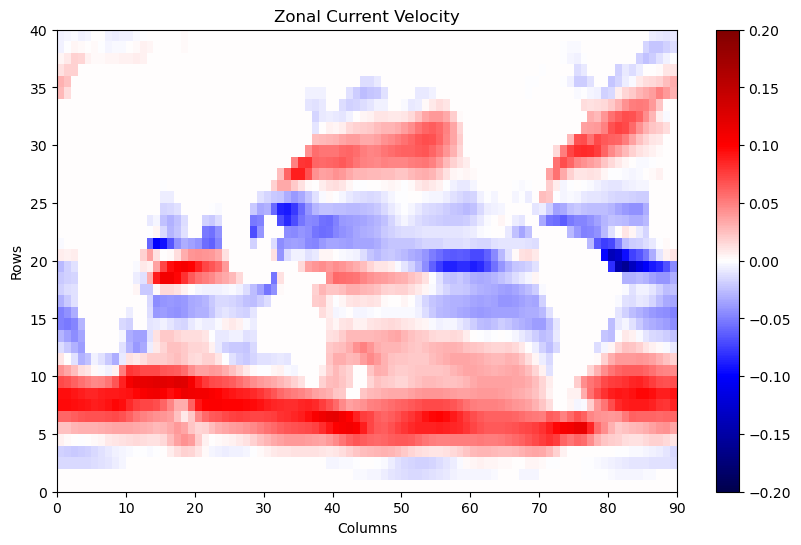

In [19]:
# make a figure object
fig = plt.figure(figsize = (10,6))

# plot the field
C = plt.pcolormesh(u_grid, cmap='seismic', vmin=-0.2, vmax=0.2)

# add a colorbar
plt.colorbar(C)

# show the figure
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Zonal Current Velocity')
plt.show()

### Masking Model Field

The model fields from MITgcm will be 0 when the cells are on land. When plotting MITgcm fields, it's usually a good idea to mask out the land points. This can be done using the "hFac" fields of the model. The field stored in `hFacC.data` is for tracer values, the field in `hFacW.data` is for zonal values, and the field in `hFacS.data` is for meridional values. 

When starting a model from `nIter=0` as we did here, the model will also output these grids. Download those fields to your local run directory and read them in here:

In [12]:
# define a path to the hFacW grid file
hfacw_file = os.path.join(lesson_folder, 'hFacW.data')

# reshape the hFac field as appropriate
hfacw_grid = np.fromfile(hfacw_file, '>f4').reshape((n_rows, n_cols))


The hfac grid can be used to mask the plotting field using numpy:

In [ ]:
# create a masked version of the uvel field


Let's see what that looks like:

In [ ]:
# recreate the plot above with the masked field


As we can see, this distinguishes the land parts of the domain from the rest of the figure.

### &#x1F914; Try it for yourself
Make equivalent plots for `THETA`, `SALT`, and `VVEL`. Try out different time steps to see how the fields are evolving through the simulation.

## Stitching Figures into Movies
Above, hopefully you noticed that the velocity fields looked quite different depending on where/when we were plotting the fields. It is often useful to create a movie with the data so you can observe how the model is evolving.

To create a movie, first we will create a function called `plot_frame` to make a figure of data given a path to the data and a file path for the saved image. Below, we will use this function in a loop to generate a plot for each individual file and then we will stitch these together into a movie. Let's create that function here

In [38]:
# define a plot_frame function which takes in two arguments:
#    - the file path of a uvel file to read
#    - the file path where the plot will be stored
def plot_frame(data_path, image_path): 

    fig = plt.figure(figsize = (10,6))

    u_grid = np.fromfile(data_path, '>f4').reshape((n_rows, n_cols))
    # plot the field
    # plt.pcolormesh(u_grid, cmap='seismic', vmin=-0.2, vmax=0.2)
    # plt.pcolormesh(u_grid, cmap='seismic', vmin=30, vmax=37)
    plt.pcolormesh(u_grid, cmap='turbo', vmin=-5, vmax=35)
    
    # add a colorbar
    plt.colorbar(label='m/s')
    plt.xlabel('Model Columns')
    plt.ylabel('Model Rows')
    plt.title('Zonal Current Velocity')
    
    # show the figure
    plt.savefig(image_path)
    plt.close(fig)

Now that the function is defined, let's loop through all of the daily outputs of our data to make panels for a movie:

In [39]:
# make a list that will hold the paths
file_list = []

# loop through each day of the year
for day in range(1, 366):

    # identify the data file path
    data_path = os.path.join(lesson_folder, 'run', 'diags', 'THETA', 'THETA.'+'{:010d}'.format(day)+'.data')
    

    # identify the image file path
    image_path = os.path.join(lesson_folder, 'plots', 'THETA', 'THETA.'+'{:010d}'.format(day)+'.png')
    

    # call the plotting function
    plot_frame(data_path, image_path)

    # add the imaghe path to the file path list (for the next step)
    file_list.append(image_path)

With our frames constructed, we can now stitch them together into a movie! With the `moviepy` module, this is fairly straight-forward:

In [40]:
# set the frames per second
fps=5

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)

# write the video to a file
output_file = os.path.join(lesson_folder, 'plots', 'THETA.mp4')
clip.write_videofile(output_file)

Moviepy - Building video /Users/cool/Workspace/MLML/ms274_fall2025/Lectures/Week 5/plots/THETA.mp4.
Moviepy - Writing video /Users/cool/Workspace/MLML/ms274_fall2025/Lectures/Week 5/plots/THETA.mp4



Moviepy - Done !
Moviepy - video ready /Users/cool/Workspace/MLML/ms274_fall2025/Lectures/Week 5/plots/THETA.mp4


### &#x1F914; Try it for yourself
Make a movie which shows the following plots in a 2x2 grid: `THETA`, `SALT`, `UVEL`, `VVEL`.

In [ ]:
import matplotlib.ticker as mticker

# make a figure object with projection
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude = 30))

# add coastlines
plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')
plt.gca().coastlines()

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.5, linestyle='-')
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,20))
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,20))
# format the axes
plt.show()

### Computing areas
If we assume the Earth is a perfect sphere with radius $R=$6,371 km, it's fairly straight-forward to compute the area of each cell if we think of each cell as taking up a given proportion of the sphere. On one hand, the area of a vertical latitude band between $\phi_1$ and $\phi_0$ has area

$$
A_{\text{Longitude Band}} = A_{Earth} \left(\frac{\phi_1 - \phi_0}{2\pi}\right)  = 2 R^2 (\phi_1 - \phi_0)
$$

Further, a little trigonometry shows the the area of a portion of the sphere between the equator and a given latitude ($\theta$) is scaled by the *sin* of the latitude. Thus, in a given latitude band between $\theta_1$ and $\theta_0$, the fractional area is  

$$
A_{\text{Latitude Band}} = A_{Earth}\left(\frac{\sin (\theta_1) - \sin (\theta_0)}{2}\right)
$$

Putting these pieces together, we can compute the surface area of a given area of a sphere as 

$$
A_{patch} = R^2 (\phi_1 - \phi_0) (\sin (\theta_1) - \sin (\theta_0)) 
$$


In [ ]:
# define the lon and lat bounds
lon_step = 0.5
lat_step = 0.5
lon_bounds = np.arange(-180, 180.01, lon_step)
lat_bounds = np.arange(-90, 90.01, lon_step)

# convert to radians
lon_bounds_rad = np.deg2rad(lon_bounds)
lat_bounds_rad = np.deg2rad(lat_bounds)

# make an array to store the area in each cell
R = 6371000
Area = np.zeros((360, 720))
for i in range(len(lon_bounds)-1):
    for j in range(len(lat_bounds)-1):
        Area[j,i] = R**2 * (lon_bounds_rad[i+1] - lon_bounds_rad[i]) * \
        (np.sin(lat_bounds_rad[j+1]) - np.sin(lat_bounds_rad[j])) 

As with any formula, it's a good idea to sanity check your results. Here, we know the each of a sphere should be $4\pi R^2$, so let's check the numbers line up:

In [ ]:
# sanity check
print(np.sum(Area))
print(np.pi * 4 * R**2)

Looks good! We can even plot the area to be sure:

In [ ]:
# make a plot of the Area with a colorbar
C = plt.pcolormesh(Area)
plt.colorbar(C)
plt.show()

As expected, the area is greater at the equator than the poles. Ok, now onto the trends:

### Sea Ice Area in the Northern Hemisphere
Equipped with our area function, we are now ready to compute the total sea ice area in the northern hemisphere through time. Let's make a list of files first, and then loop through them to compute the area:

In [ ]:
# make a list to contain the file names
file_list = []

# loop through the 12 months
for year in range(1992,2018):
    for month in range(1,13):
        file_list.append('SIarea_'+str(year)+'_'+'{:02d}'.format(month)+'.nc')

# print out the file names (if desired)
# print(file_list)

Now, loop through each file in the list, storing the total area of the sea ice in an array for plotting:

In [ ]:
# make a list to store the temperature values
si_area = np.zeros((len(file_list),))

# loop through each file
for i in range(len(file_list)):
    
    # identify path to the data file
    month_file = os.path.join(data_folder,'ECCO','Version4','Release4',
                          'interp_monthly','SIarea',file_list[i])
    
    # read in the data 
    ds = xr.open_dataset(month_file)
    SIarea = np.array(ds['SIarea'][:])
    ds.close()

    # subset to first timestep
    SIarea = SIarea[0,:,:]

    # mask points in the southern ocean
    SIarea[:180, :] = 0

    # compute the total sea ice area
    total_area = np.sum(SIarea*Area)

    # add the computed area to the list
    # the list of temperatures
    si_area[i] = total_area

Now that we've got our sea ice area timeseries, let's make a plot:

In [ ]:
fig = plt.figure(figsize=(8,4))
plt.plot(si_area)
plt.title('Northern Hemisphere Sea Ice Area')
plt.ylabel('Sea ice area (m$^2$)')
plt.xlabel('Month since 1992/1')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

### Computing Trends
How much has sea ice declined in the time period shown above? Let's compute a trend line to determine how much ice is lost during this time period.

First things first, we need to define a time array.

In [ ]:
# define a time array for months
months = np.arange(len(file_list))

# convert to "decimal years"
years = 1992 + months/12

With the time array in hand, we can now fit a line to the data. To fit a simple trend line, we can use the `polyfit` function from `numpy` with a degree of 1:

In [ ]:
# compute the line coefficients
line_coefficients = np.polyfit(years, si_area, deg=1)

# print the coefficients
print(line_coefficients)

# sanity check: one is the slope and one is intercept - which is which?

Let's plot the trend line on the data to ensure it looks as expected:

In [ ]:
fig = plt.figure(figsize=(8,4))

# plot the data
plt.plot(years, si_area)

# plot the trend line
plt.plot(years, line_coefficients[0]*years + line_coefficients[1])

plt.title('Northern Hemisphere Sea Ice Area')
plt.ylabel('Sea ice area (m$^2$)')
plt.xlabel('Month since 1992/1')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

### Interpreting Trends
The slope of the trend line estimates how much the variable is changing through time. Consider the following questions:
1. Is northern hemisphere sea ice being lost or gained?
2. What are the units of the slope of the trend line?
3. What is the equivalent slope in units of square miles? ($1$ mile$^2$ = $2.59 \times 10^6$ m$^2$)

In [ ]:
# compute the trend in square miles
sq_miles = line_coefficients[0]*(1/2.59e6)

# print out the result
print(sq_miles)

### &#x1F914; Try it yourself
How do the trends in the Southern Hemisphere compare to those in the Northern Hemisphere?

In [ ]:
# repeat your code here, but for the southern hemisphere